# Local Outlier Factor

Local Outlier Factor is an unsupervised anomaly detection algorithm that identifies outliers by comparing the density of data points to the density of their neighbours. Low density, compared to their neighbours, are flagged as anomalies. 
- Uses K-nearest to select neighbours to compute reachability distance for, that is made into a LOF score
- LOF = 1, density is similar to neighbours
- LOF > 1 denisty is significantly lower than neighbours, outlier
- LOF < 1 denisty higher than its neighbours, part of dense cluster


## Dependencies

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import train_test_split

import time

## Import Data

Features:
- trip_distance
- fare_amount
- tip_amount
- congestion_surcharge
- time_diff_minutes

In [0]:
file_location = "/FileStore/tables/proceessed/part-00000-tid-7216056373568144993-71829a2c-6d1e-4bc4-867b-e7304ed9bfd4-880-1-c000.snappy.parquet"

file_type = "parquet"

df = spark.read.format(file_type) \
  .load(file_location)

df.display()

passenger_count trip_distance PULocationID DOLocationID payment_type fare_amount extra tip_amount total_amount congestion_surcharge time_diff_minutes day_of_week 1.0 0.41 24.0 24.0 1.0 4.0 0.5 1.06 6.36 0.0 2.783 5 1.0 0.41 43.0 43.0 2.0 3.5 0.5 0.0 4.8 0.0 1.033 6 1.0 0.4 24.0 24.0 1.0 4.0 0.5 5.0 10.3 0.0 2.683 6 1.0 0.27 43.0 43.0 2.0 3.0 0.5 0.0 6.8 2.5 0.833 6 1.0 1.34 43.0 43.0 1.0 6.0 0.5 1.0 10.8 2.5 4.967 6 3.0 0.42 43.0 43.0 1.0 3.5 0.5 0.6 5.4 0.0 1.133 6 1.0 3.52 24.0 43.0 1.0 12.5 0.5 1.0 17.3 2.5 12.567 6 1.0 0.9 43.0 43.0 2.0 5.0 2.5 0.0 8.3 2.5 3.783 6 1.0 0.0 43.0 43.0 3.0 5.5 2.5 0.0 8.8 2.5 4.35 6 1.0 0.92 43.0 43.0 1.0 5.5 0.0 1.76 10.56 2.5 4.85 6 1.0 2.1 43.0 43.0 2.0 8.0 0.0 0.0 11.3 2.5 1029.033 6 1.0 0.64 43.0 43.0 2.0 4.5 0.0 0.0 7.8 2.5 2.933 6 1.0 3.4 24.0 43.0 1.0 13.5 2.5 3.35 20.15 2.5 16.4 6 1.0 0.01 43.0 43.0 2.0 2.5 0.0 0.0 5.8 2.5 0.317 6 2.0 0.3 24.0 24.0 1.0 3.5 0.0 0.0 4.3 0.0 2.217 6 1.0 0.91 43.0 43.0 2.0 5.0 0.0 0.0 8.3 2.5 3.483 6 2.0 0.11 43.0 43.0 2.0 2.5 0.0 0.0 5.8 2.5 0.433 6 1.0 1.3 43.0 43.0 1.0 8.0 0.0 1.0 12.3 2.5 9.85 6 1.0 1.59 43.0 43.0 2.0 9.0 0.0 0.0 12.3 2.5 9.633 6 1.0 0.6 43.0 43.0 4.0 8.5 2.5 0.0 11.8 2.5 12.433 6 1.0 1.35 43.0 43.0 1.0 7.0 0.0 1.0 11.3 2.5 6.25 6 1.0 1.2 43.0 43.0 1.0 7.0 0.0 2.06 12.36 2.5 6.933 6 1.0 1.29 43.0 43.0 2.0 7.0 0.0 0.0 10.3 2.5 6.717 6 1.0 0.34 43.0 43.0 1.0 3.5 0.0 1.02 7.82 2.5 1.533 6 5.0 0.83 43.0 43.0 1.0 6.0 0.0 1.86 11.16 2.5 6.4 6 3.0 1.9 43.0 43.0 1.0 11.0 2.5 2.0 16.3 2.5 13.25 6 1.0 1.32 43.0 43.0 1.0 7.5 0.0 2.16 12.96 2.5 7.433 6 1.0 1.86 43.0 43.0 1.0 9.5 0.0 2.56 15.36 2.5 11.533 6 2.0 1.1 43.0 24.0 1.0 6.5 2.5 1.96 11.76 2.5 6.417 6 2.0 1.87 24.0 43.0 1.0 11.0 0.0 2.86 17.16 2.5 14.183 6 1.0 0.52 43.0 43.0 1.0 5.5 0.0 1.32 10.12 2.5 5.9 6 2.0 0.98 43.0 43.0 1.0 6.5 0.0 1.0 10.8 2.5 6.75 6 2.0 1.74 43.0 24.0 1.0 11.5 0.0 2.96 17.76 2.5 15.433 6 3.0 1.04 43.0 43.0 1.0 7.0 0.0 1.7 12.0 2.5 7.483 6 1.0 1.22 43.0 24.0 1.0 7.5 0.0 1.0 9.3 0.0 8.967 6 1.0 1.5 43.0 24.0 1.0 8.0 0.0 1.0 12.3 2.5 8.183 6 1.0 0.15 43.0 43.0 2.0 3.0 0.0 0.0 6.3 2.5 1.133 6 1.0 2.29 43.0 43.0 1.0 14.0 0.0 3.46 20.76 2.5 19.933 6 1.0 1.19 43.0 43.0 1.0 8.0 0.0 2.25 13.55 2.5 9.817 6 2.0 1.89 43.0 43.0 1.0 12.0 0.0 2.3 17.6 2.5 17.3 6 3.0 1.44 43.0 43.0 2.0 8.0 0.0 0.0 11.3 2.5 8.033 6 1.0 2.19 43.0 43.0 1.0 10.0 0.0 2.66 15.96 2.5 11.7 6 5.0 0.77 43.0 43.0 1.0 4.5 0.0 1.2 9.0 2.5 2.7 6 1.0 0.51 43.0 43.0 1.0 4.0 0.0 1.1 8.4 2.5 3.083 6 2.0 0.51 24.0 24.0 2.0 4.0 0.0 0.0 4.8 0.0 2.467 6 3.0 0.45 43.0 43.0 1.0 4.0 0.0 1.2 6.0 0.0 2.317 6 2.0 0.7 43.0 43.0 1.0 5.5 2.5 0.0 8.8 2.5 4.883 6 1.0 0.44 43.0 43.0 1.0 4.0 0.0 1.46 8.76 2.5 2.783 6 1.0 1.87 43.0 43.0 1.0 10.5 0.0 2.76 16.56 2.5 12.883 6 1.0 1.6 43.0 24.0 1.0 7.0 2.5 2.55 12.85 2.5 7.583 6 1.0 0.57 43.0 43.0 2.0 4.5 0.0 0.0 7.8 2.5 3.167 6 1.0 0.56 43.0 43.0 1.0 7.0 0.0 1.5 11.8 2.5 8.583 6 1.0 1.9 43.0 43.0 1.0 11.0 2.5 2.15 16.45 2.5 14.8 6 1.0 0.41 43.0 43.0 1.0 4.0 0.0 1.1 8.4 2.5 3.117 6 2.0 0.42 43.0 43.0 2.0 5.0 0.0 0.0 5.8 0.0 5.667 6 1.0 0.76 43.0 43.0 1.0 5.5 0.0 1.76 10.56 2.5 5.333 6 1.0 1.36 43.0 43.0 2.0 7.5 0.0 0.0 10.8 2.5 8.0 6 1.0 0.99 43.0 43.0 2.0 6.5 0.0 0.0 9.8 2.5 7.1 6 1.0 0.6 43.0 43.0 2.0 5.5 0.0 0.0 8.8 2.5 5.083 6 1.0 0.5 43.0 43.0 1.0 3.5 2.5 1.35 8.15 2.5 1.483 6 3.0 1.42 24.0 43.0 1.0 9.5 0.0 2.58 12.88 0.0 12.8 6 1.0 0.6 43.0 43.0 1.0 5.5 2.5 1.75 10.55 2.5 5.4 6 1.0 0.36 43.0 43.0 1.0 3.5 0.0 1.36 8.16 2.5 2.1 6 1.0 0.8 43.0 43.0 1.0 5.0 0.0 1.24 9.54 2.5 3.433 6 1.0 1.01 43.0 43.0 2.0 6.5 0.0 0.0 7.3 0.0 7.033 6 1.0 1.2 24.0 43.0 1.0 8.0 0.0 2.6 11.4 0.0 9.917 6 1.0 0.8 43.0 43.0 1.0 6.0 2.5 2.3 11.6 2.5 6.717 6 1.0 0.4 43.0 43.0 1.0 6.5 2.5 1.95 11.75 2.5 8.583 6 1.0 1.73 43.0 43.0 1.0 8.0 0.0 2.83 14.13 2.5 7.367 6 6.0 1.04 24.0 43.0 1.0 6.5 0.0 1.46 8.76 0.0 7.683 6 1.0 0.77 43.0 43.0 1.0 5.0 0.0 1.66 9.96 2.5 3.317 6 1.0 0.7 43.0 43.0 1.0 4.5 0.0 1.0 8.8 2.5 3.533 6 1.0 2.07 43.0 43.0 1.0 11.5 0.0 2.96 17.76 2.5 14.417 6 1.0 0.93 43.0 43.0 1.0 6.0 0.0 1.86 11.

In [0]:
from pyspark.ml.feature import MinMaxScaler, VectorAssembler
from pyspark.ml import Pipeline

input_cols = ['trip_distance', 'fare_amount', 'tip_amount', 'congestion_surcharge', 'time_diff_minutes']

assembler = VectorAssembler(inputCols=input_cols, outputCol="features")
scaler = MinMaxScaler(inputCol="features", outputCol="scaled_features")
pipeline = Pipeline(stages=[assembler, scaler])

scaled_df = pipeline.fit(df).transform(df)
scaled_df.select('scaled_features').display()

scaled_features Map(vectorType -> dense, length -> 5, values -> List(0.016734693877551016, 0.18857142857142858, 0.0106, 0.47619047619047616, 0.0019337360155032403)) Map(vectorType -> dense, length -> 5, values -> List(0.016734693877551016, 0.18285714285714286, 0.0, 0.47619047619047616, 7.177683449568262E-4)) Map(vectorType -> dense, length -> 5, values -> List(0.016326530612244896, 0.18857142857142858, 0.05, 0.47619047619047616, 0.001864252148614874)) Map(vectorType -> dense, length -> 5, values -> List(0.011020408163265306, 0.17714285714285713, 0.0, 0.9523809523809523, 5.788006111800932E-4)) Map(vectorType -> dense, length -> 5, values -> List(0.054693877551020405, 0.21142857142857144, 0.01, 0.9523809523809523, 0.0034512636683451652)) Map(vectorType -> dense, length -> 5, values -> List(0.01714285714285714, 0.18285714285714286, 0.006, 0.47619047619047616, 7.872522118451928E-4)) Map(vectorType -> dense, length -> 5, values -> List(0.1436734693877551, 0.2857142857142857, 0.01, 0.9523809523809523, 0.008732037551861022)) Map(vectorType -> dense, length -> 5, values -> List(0.03673469387755102, 0.2, 0.0, 0.9523809523809523, 0.0026285746843869055)) Map(vectorType -> dense, length -> 5, values -> List(0.0, 0.2057142857142857, 0.0, 0.9523809523809523, 0.0030225482096439436)) Map(vectorType -> dense, length -> 5, values -> List(0.037551020408163265, 0.2057142857142857, 0.0176, 0.9523809523809523, 0.003369967544085776)) Map(vectorType -> dense, length -> 5, values -> List(0.08571428571428572, 0.2342857142857143, 0.0, 0.9523809523809523, 0.7150119199573647)) Map(vectorType -> dense, length -> 5, values -> List(0.026122448979591834, 0.19428571428571428, 0.0, 0.9523809523809523, 0.00203796181583579)) Map(vectorType -> dense, length -> 5, values -> List(0.13877551020408163, 0.29714285714285715, 0.0335, 0.9523809523809523, 0.01139535416969211)) Map(vectorType -> dense, length -> 5, values -> List(4.081632653061224E-4, 0.17142857142857143, 0.0, 0.9523809523809523, 2.202638580361219E-4)) Map(vectorType -> dense, length -> 5, values -> List(0.012244897959183673, 0.18285714285714286, 0.0, 0.47619047619047616, 0.001540457328915086)) Map(vectorType -> dense, length -> 5, values -> List(0.037142857142857144, 0.2, 0.0, 0.9523809523809523, 0.002420123083721806)) Map(vectorType -> dense, length -> 5, values -> List(0.004489795918367347, 0.17142857142857143, 0.0, 0.9523809523809523, 3.0086514362662707E-4)) Map(vectorType -> dense, length -> 5, values -> List(0.053061224489795916, 0.2342857142857143, 0.01, 0.9523809523809523, 0.006844160888504103)) Map(vectorType -> dense, length -> 5, values -> List(0.06489795918367347, 0.24571428571428572, 0.0, 0.9523809523809523, 0.006693380897356347)) Map(vectorType -> dense, length -> 5, values -> List(0.024489795918367346, 0.24, 0.0, 0.9523809523809523, 0.008638929170230611)) Map(vectorType -> dense, length -> 5, values -> List(0.05510204081632653, 0.22285714285714286, 0.01, 0.9523809523809523, 0.004342741680522908)) Map(vectorType -> dense, length -> 5, values -> List(0.04897959183673469, 0.22285714285714286, 0.0206, 0.9523809523809523, 0.004817316491370452)) Map(vectorType -> dense, length -> 5, values -> List(0.052653061224489796, 0.22285714285714286, 0.0, 0.9523809523809523, 0.00466723133889158)) Map(vectorType -> dense, length -> 5, values -> List(0.013877551020408163, 0.18285714285714286, 0.0102, 0.9523809523809523, 0.0010651876793986589)) Map(vectorType -> dense, length -> 5, values -> List(0.03387755102040816, 0.21142857142857144, 0.018600000000000002, 0.9523809523809523, 0.004446967480855458)) Map(vectorType -> dense, length -> 5, values -> List(0.07755102040816325, 0.26857142857142857, 0.02, 0.9523809523809523, 0.009206612362708566)) Map(vectorType -> dense, length -> 5, values -> List(0.053877551020408164, 0.22857142857142856, 0.0216, 0.9523809523809523, 0.005164735825812284)) Map(vectorType -> dense, length -> 5, values -> List(0.07591836734693877, 0.25142857142857145, 0.0256, 0.9523809523809523, 0.00

## Model

In [0]:
# Prepare data

s_time = time.time()

model_df = scaled_df.toPandas()
X = np.array(model_df['scaled_features'].to_list())

e_time = time.time()
data_conversion_time = e_time - s_time

print(f"Data Conversion Time: {data_conversion_time}")

In [0]:
# Build model

s_time = time.time()

lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
ypred = lof.fit_predict(X)

e_time = time.time()
train_time = e_time - s_time

print(f"Train_predict time: {train_time}")
print(f"Total time: {train_time + data_conversion_time}")

## Evaluation


#### Box plot LOF scores
Plot below could also be a way of finding an optimal contamination factor. Easy to see when the distance between lof scores becomes minimal, even for multivariate models. 

For the comparison between this model and the others I will use about 5% regardless, but for future reference this can be helpful. 

Percentage kept: 0.8189746904679032


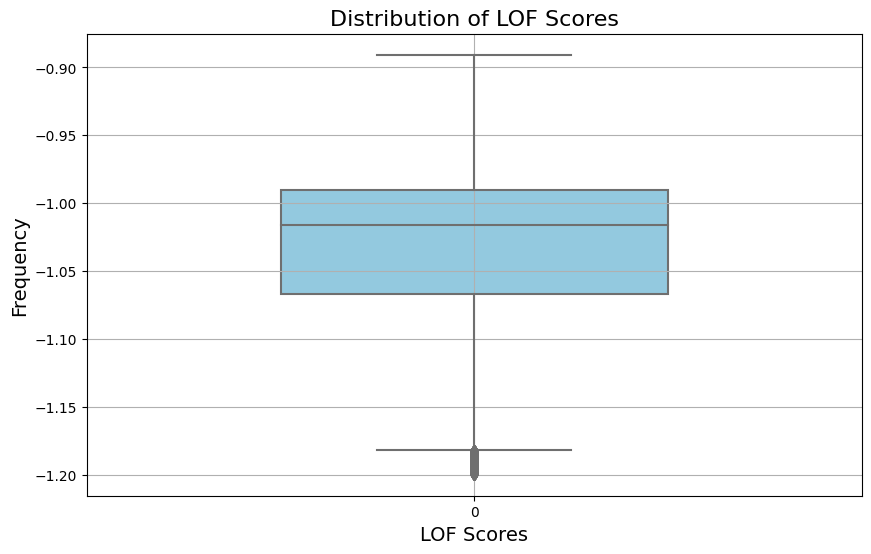

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

threshold = -1.2
lof_scores = [x for x in lof.negative_outlier_factor_ if x > threshold]

print(f"Percentage kept: {len(lof_scores) / len(lof.negative_outlier_factor_)}")


plt.figure(figsize=(10, 6))
sns.boxplot(data=lof_scores, color='skyblue', width=0.5)
plt.title('Distribution of LOF Scores', fontsize=16)
plt.xlabel('LOF Scores', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

plt.grid(True)
plt.show()

#### Pair Plot

In [0]:
model_df["outliers"] = ypred
model_df["lof_scores"] = lof.negative_outlier_factor_

passenger_count  trip_distance  ...  outliers  lof_scores
0              1.0           0.41  ...         1   -1.202502
1              1.0           0.41  ...         1   -1.542874
2              1.0           0.40  ...         1   -1.091143
3              1.0           0.27  ...         1   -1.019501
4              1.0           1.34  ...         1   -1.234866

[5 rows x 16 columns]

In [0]:
print(f"Number of normal points: {sum(model_df['outliers'] ==1)}")
print(f"Number of anomalies: {sum(model_df['outliers'] ==-1)}")

print(f"Anomaly percentage: {round(sum(model_df['outliers'] == -1) / len(model_df['outliers']), 2)}%")

Number of normal points: 95527
Number of anomalies: 5028
Anomaly percentage: 0.05%


In [0]:
input_cols = ['trip_distance', 'fare_amount', 'tip_amount', 'congestion_surcharge', 'time_diff_minutes']
pair_cols = input_cols
pair_cols.append("outliers")
df_pairplot = model_df[pair_cols]
df_pairplot.head()

trip_distance  fare_amount  ...  time_diff_minutes  outliers
0           0.41          4.0  ...              2.783         1
1           0.41          3.5  ...              1.033         1
2           0.40          4.0  ...              2.683         1
3           0.27          3.0  ...              0.833         1
4           1.34          6.0  ...              4.967         1

[5 rows x 6 columns]

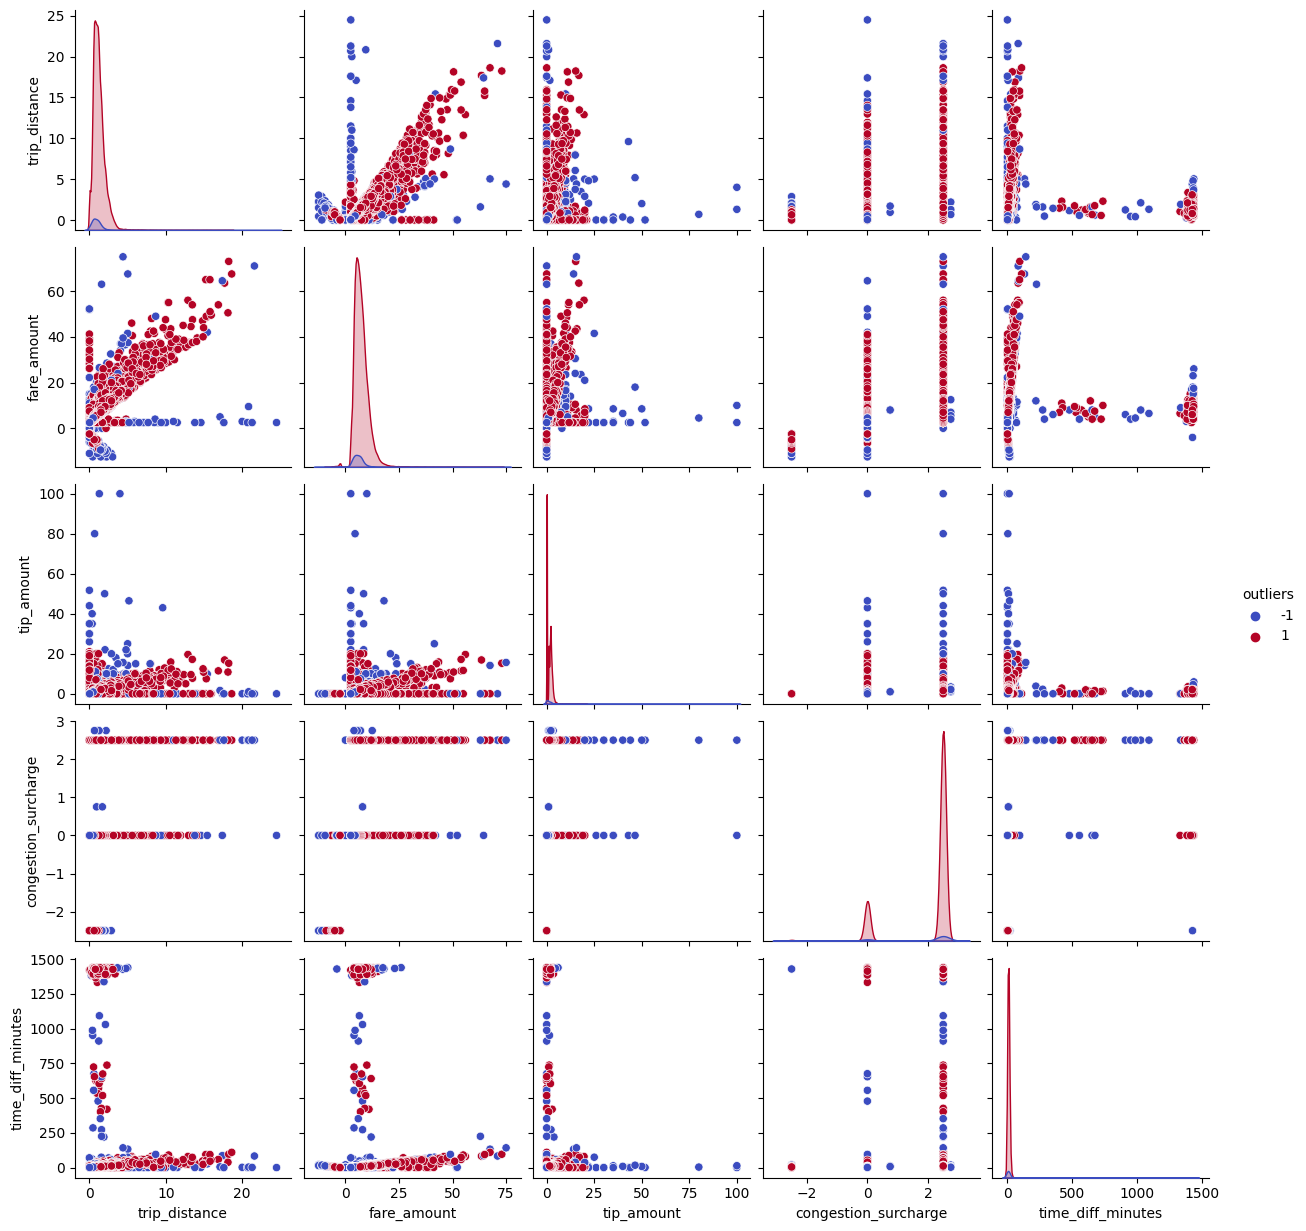

In [0]:
sns.pairplot(df_pairplot, hue="outliers", palette="coolwarm")
plt.show()

In [0]:
import time
time.sleep(30000)

### Mean and Variance

In [0]:
model_df_scaled = pd.DataFrame(np.array(model_df["scaled_features"].to_list()))
input_cols = ['trip_distance', 'fare_amount', 'tip_amount', 'congestion_surcharge', 'time_diff_minutes']
model_df_scaled.columns = input_cols
model_df_scaled["outliers"] = model_df["outliers"]
model_df_scaled.head()

          0         1       2         3         4
0  0.016735  0.188571  0.0106  0.476190  0.001934
1  0.016735  0.182857  0.0000  0.476190  0.000718
2  0.016327  0.188571  0.0500  0.476190  0.001864
3  0.011020  0.177143  0.0000  0.952381  0.000579
4  0.054694  0.211429  0.0100  0.952381  0.003451


trip_distance  fare_amount  ...  time_diff_minutes  outliers
0       0.016735     0.188571  ...           0.001934         1
1       0.016735     0.182857  ...           0.000718         1
2       0.016327     0.188571  ...           0.001864         1
3       0.011020     0.177143  ...           0.000579         1
4       0.054694     0.211429  ...           0.003451         1

[5 rows x 6 columns]

In [0]:
X_scaled = model_df_scaled.loc[model_df_scaled["outliers"] == 1]
y_scaled = model_df_scaled.loc[model_df_scaled["outliers"] == -1]

In [0]:
normal_variance = X_scaled.var()
normal_mean = X_scaled.mean()

print(f"The mean of the normal points is: {normal_mean} \n The variance of the normal points is: {normal_variance}\n")

anomaly_variance = y_scaled.var()
anomaly_mean = y_scaled.mean()

print(f"The mean of the anomaly points is: {anomaly_mean} \n The variance of the anomaly points is: {anomaly_variance}")

The mean of the normal points is: trip_distance           0.050030
fare_amount             0.225575
tip_amount              0.013120
congestion_surcharge    0.873381
time_diff_minutes       0.007440
outliers                1.000000
dtype: float64 
 The variance of the normal points is: trip_distance           0.001130
fare_amount             0.001493
tip_amount              0.000161
congestion_surcharge    0.032917
time_diff_minutes       0.002010
outliers                0.000000
dtype: float64

The mean of the anomaly points is: trip_distance           0.040136
fare_amount             0.210902
tip_amount              0.011569
congestion_surcharge    0.832036
time_diff_minutes       0.007683
outliers               -1.000000
dtype: float64 
 The variance of the anomaly points is: trip_distance           0.002370
fare_amount             0.002242
tip_amount              0.001126
congestion_surcharge    0.047720
time_diff_minutes       0.002755
outliers                0.000000
dtype: float